Overall Workflow (What You Are Building)
CSV File
   ↓
Read using Pandas
   ↓
Analyze Data (stats, totals, averages)
   ↓
(Optional) Create charts
   ↓
Generate PDF using FPDF / ReportLab


In [1]:
!pip list

Package                           Version
--------------------------------- --------------------
aiobotocore                       2.25.0
aiodns                            3.5.0
aiohappyeyeballs                  2.6.1
aiohttp                           3.13.2
aioitertools                      0.12.0
aiosignal                         1.4.0
alabaster                         0.7.16
altair                            5.5.0
anaconda-anon-usage               0.7.5
anaconda-auth                     0.12.0
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.7.0
anaconda-client                   1.14.0
anaconda-navigator                2.7.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.10.0
appdirs                           1.4.4
archspec                          0.2.5
argon2-cffi                       21.3.0
argon2-cffi-bindings              25.1.0
arrow                             1.4.0
astroid      

In [3]:
import pandas as pd

df = pd.read_csv("D:/all_data/all_data.csv")

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


UNDERSTAND THE DATASET

In [4]:
df.shape

(186850, 6)

In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
df.isnull().sum() # clean data check the missing values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df=df.dropna() # if missing values exist 

In [12]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.columns


Index([], dtype='object')

In [14]:
df = df[df["Order Date"] != "Order Date"]
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])


In [16]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.columns


Index(['Quantity Ordered', 'Price Each'], dtype='object')

In [17]:
df["Revenue"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [18]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.columns


Index(['Quantity Ordered', 'Price Each', 'Revenue'], dtype='object')

Create Charts for PDF

In [20]:
product_sales = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

product_sales.head()


Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

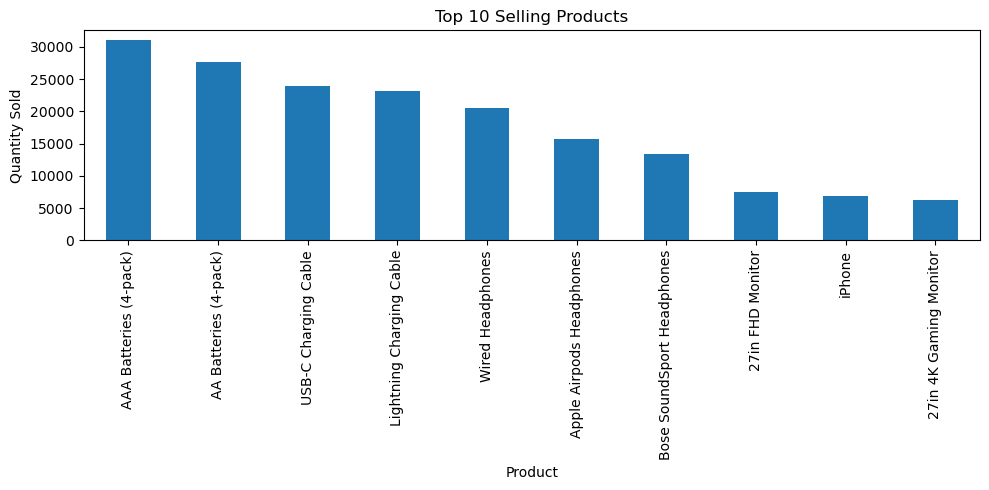

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
product_sales.head(10).plot(kind='bar')
plt.title("Top 10 Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()
plt.close()


In [23]:
import os
print(os.listdir())



['.anaconda', '.bash_history', '.conda', '.continuum', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.lesshst', '.matplotlib', '.node_repl_history', '.python_history', '.TurboVPN', '.virtual_documents', '.vscode', 'Anaconda jupyterlab codes', 'anaconda_projects', 'AppData', 'Application Data', 'Automated Report.ipynb', 'Automated_Report.pdf', 'battery-report.html', 'CodeTech.ipynb', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'DSBDA', 'Favorites', 'IdeaProjects', 'IdeaSnapshots', 'interactive_weather.html', 'Links', 'Local Settings', 'LP-main', 'LP.zip', 'magic_cmds.ipynb', 'mumbai_weather_dashboard.png', 'mumbai_weather_forecast.csv', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer0000000000

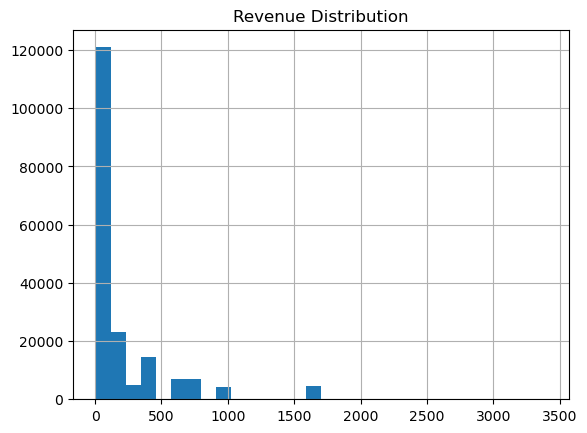

In [25]:
plt.figure()
df["Revenue"].hist(bins=30)
plt.title("Revenue Distribution")
plt.savefig("revenue_hist.png")
plt.show()
plt.close()


In [27]:
# Calculate summary statistics again

total_revenue = df["Revenue"].sum()
total_quantity = df["Quantity Ordered"].sum()
avg_price = df["Price Each"].mean()

print(total_revenue, total_quantity, avg_price)


34492035.97 209079 184.3997347674106


In [29]:
# Ensure revenue column exists
df["Revenue"] = df["Quantity Ordered"] * df["Price Each"]

# Summary values for report
total_revenue = df["Revenue"].sum()
total_quantity = df["Quantity Ordered"].sum()
avg_price = df["Price Each"].mean()
generate_pdf()


In [30]:
print(total_revenue)

34492035.97


In [31]:
from IPython.display import FileLink
FileLink("Sales_Report.pdf")


C:\Users\adity\Sales_Report.pdf

Report Generated On: 06 Feb 2026
Dataset: Kaggle Sales Dataset
